In [59]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [60]:
steps = 50
r_infinity = np.linspace(0, .5, steps)

def f_func(x):
    return x

def g_func(x, R_naught): 
    return 1 - np.e**(-R_naught*x)

def Plot(plot, R_naught):
    f = r_infinity
    g = 1 - np.e**(-R_naught*r_infinity)
    intersectionPoint = GetIntersection(current_R_naught)
    plot.cla()
    plot.plot(r_infinity,g,label='$g(r_\u221E)$')
    plot.plot(r_infinity,f,label='$f(r_\u221E)$')
    plot.scatter(intersectionPoint, f_func(intersectionPoint))
    plot.set_title("$R_0$ = " + str(R_naught))
    plot.set_xlabel("$r_\u221E$")
    plot.set_ylabel("$f(r_\u221E), g(r_\u221E)$")
    plot.legend()

def GetIntersection(R_naught):
    return fsolve(lambda x : f_func(x)-g_func(x, R_naught), 1)


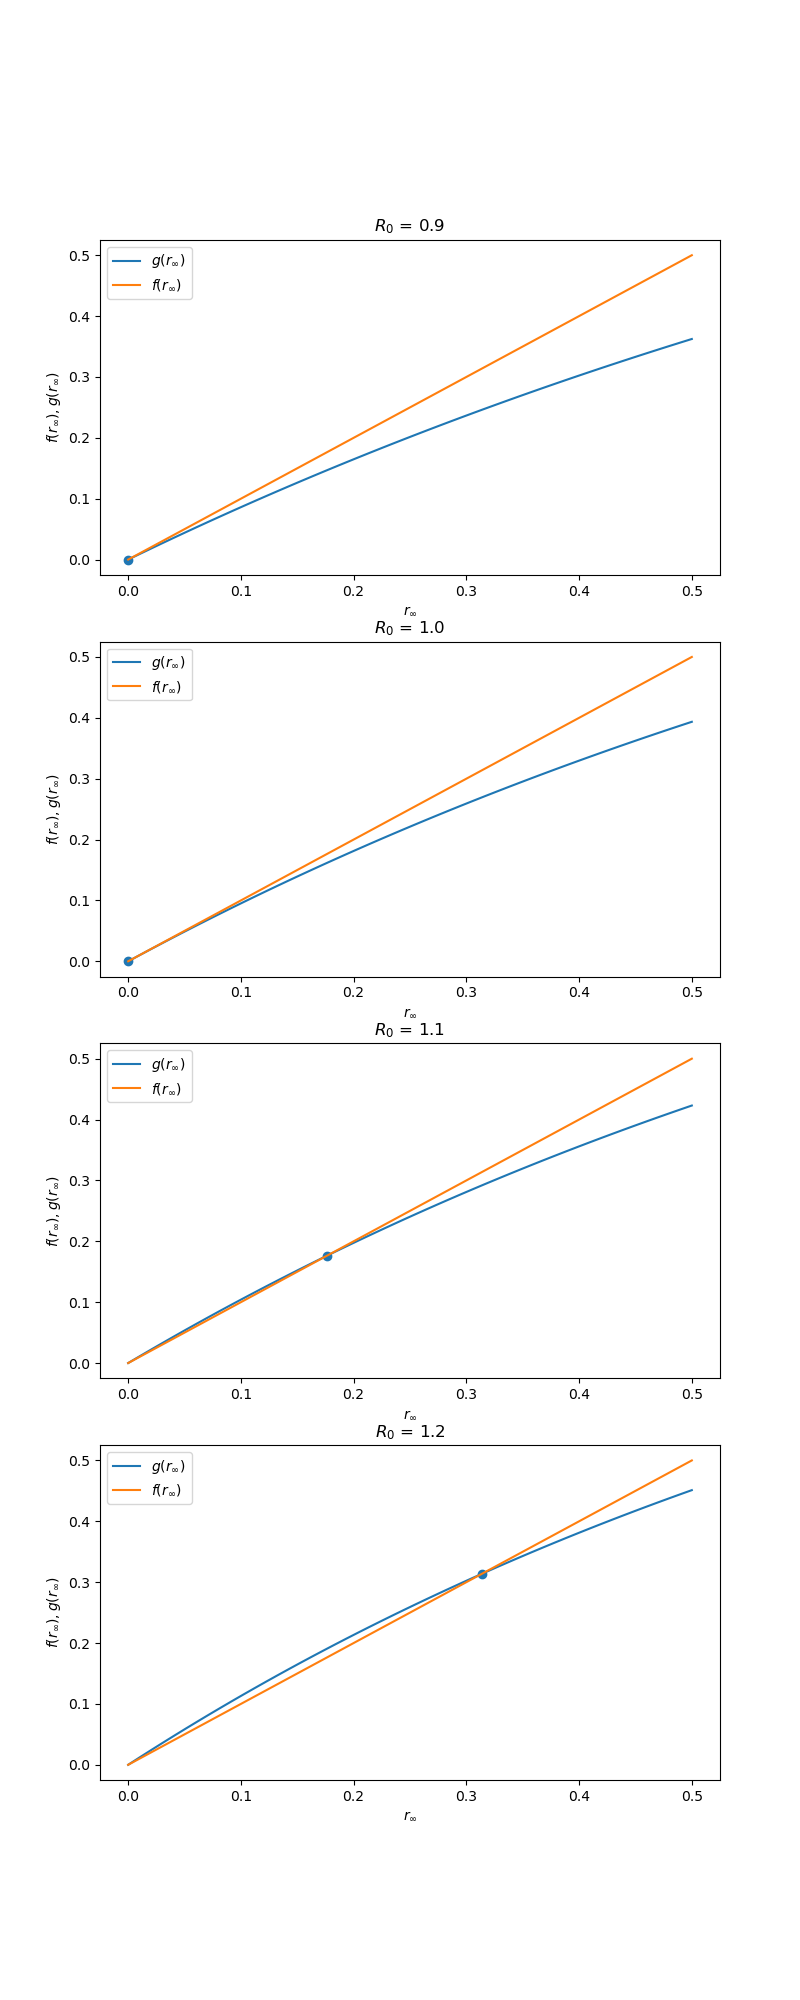

In [61]:
fig, axs = plt.subplots(4, figsize=(8, 20))

current_R_naught = 0.9
Plot(axs[0], current_R_naught)


current_R_naught = 1.0
Plot(axs[1], current_R_naught)


current_R_naught = 1.1
Plot(axs[2], current_R_naught)

current_R_naught = 1.2
Plot(axs[3], current_R_naught)

plt.show()
plt.savefig('problem3bGraphs.png')



In [62]:
def ForwardEulerSolver(N, I_initial, S_initial, Beta, Gamma):
    
    # Set x limit
    xRange = 50
    
    
    dt = 0.01
    
    # Find initial R
    # In this problem, the initial R would be 0
    R_initial = N - (S_initial + I_initial)
    
    S = [S_initial]
    I = [I_initial]
    R = [R_initial]
    
    t = [0]
    
    # Find number of steps until you reach xRange and loop through them
    for n in range(int(xRange / dt)):
        
        dS = - Beta * S[n] * I[n] / N
        S_nPlusOne = S[n] + dt * dS
        S.append(S_nPlusOne)
        
        dI = Beta * S[n] * I[n] / N - Gamma * I[n]
        I_nPlusOne = I[n] + dt * dI
        I.append(I_nPlusOne)
        
        dR = Gamma * I[n]
        R_nPlusOne = R[n] + dt * dR
        R.append(R_nPlusOne)
        
        t_nPlusOne = t[n] + dt
        t.append(t_nPlusOne)
    return [t,S,I,R]

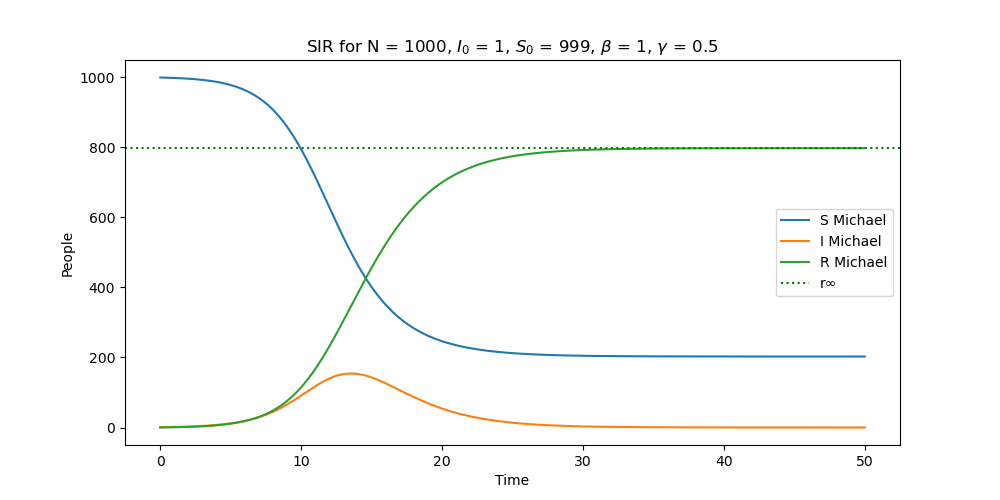

In [63]:
N = 1000
I_initial = 1
S_initial = 999
Beta = 1
Gamma = 0.5
R_naught = Beta / Gamma

#Beta = 1, Gamma = 0.5
t,S,I,R = ForwardEulerSolver(N, I_initial, S_initial, Beta, Gamma)
plt.figure(1)
fig, axs = plt.subplots(1, figsize=(10, 5))
plt.plot(t, S, label='S Michael')
plt.plot(t, I, label='I Michael')
plt.plot(t, R, label='R Michael')

# Get r infinity
intersection = GetIntersection(R_naught)
# Multiply by total population to get total number of recovered 
totalRLongTerm = intersection * N
plt.axhline(y = totalRLongTerm, color = 'g', linestyle = 'dotted', label="r\u221E") 

plt.xlabel("Time")
plt.ylabel("People")
plt.legend()
plt.title("SIR for N = 1000, $I_0$ = 1, $S_0$ = 999, $\u03B2$ = 1, $\u03B3$ = 0.5")
plt.show()
plt.savefig('problem3dGraph.png')